In [197]:
#Cleaning Data for Project_1

In [198]:
import pandas as pd
file_path = "/Users/irynaoleinikova/Documents/Ironhack/Projects/Project-1/collected_data/netflix_titles_genres.csv"

df = pd.read_csv('/Users/irynaoleinikova/Documents/Ironhack/Projects/Project-1/collected_data/netflix_titles_genres.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [199]:
# Removed the 'show_id', 'director', and 'cast' columns
df.drop(['show_id', 'director', 'cast'], axis=1, inplace=True)

# Dropped rows with missing values (NaN) in the 'country',  and 'listed_in' columns
df.dropna(subset=['country', 'listed_in'], inplace=True)

# Sorted the dataset by ascending order of the 'release_year' column
df_cleaned_sorted = df_cleaned.sort_values(by='release_year', ascending=True)
df

# Removed duplicate rows from the dataset
df.drop_duplicates(inplace=True)

In [200]:
# Found the top 10 countries with the most popular movies and TV shows
top_10_countries = df['country'].value_counts().nlargest(10)

# Found the top 10 genres based on the 'listed_in' column
top_10_genres = df['listed_in'].value_counts().nlargest(10)

print("Top 10 countries with the most popular movies and TV shows:")
print(top_10_countries)

print("\nTop 10 genres based on the 'listed_in' column:")
print(top_10_genres)

Top 10 countries with the most popular movies and TV shows:
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

Top 10 genres based on the 'listed_in' column:
listed_in
Documentaries                                       343
Dramas, International Movies                        337
Stand-Up Comedy                                     303
Comedies, Dramas, International Movies              260
Dramas, Independent Movies, International Movies    243
Children & Family Movies, Comedies                  181
Kids' TV                                            176
Documentaries, International Movies                 165
Dramas, International Movies, Romantic Movies       163
Comedies, International Movies                      155
Name: count, dtype: int64


In [201]:
# Filtered the dataset for entries from India
df_india = df[df['country'] == 'India']

# Separated movies and TV shows
movies = df_india[df_india['type'] == 'Movie'].nlargest(5, 'release_year')
tv_shows = df_india[df_india['type'] == 'TV Show'].nlargest(5, 'release_year')

# Displayed the top 5 movies and TV shows with their genres and release years
print("Top 5 Movies from India:")
print(movies[['title', 'listed_in', 'release_year']])

print("\nTop 5 TV Shows from India:")
print(tv_shows[['title', 'listed_in', 'release_year']])

Top 5 Movies from India:
                  title                                         listed_in  \
190          Thimmarusu                      Dramas, International Movies   
551     Haseen Dillruba  International Movies, Romantic Movies, Thrillers   
735             Sarbath            Comedies, Dramas, International Movies   
850            99 Songs    Dramas, International Movies, Music & Musicals   
871  Sardar Ka Grandson            Comedies, Dramas, International Movies   

     release_year  
190          2021  
551          2021  
735          2021  
850          2021  
871          2021  

Top 5 TV Shows from India:
              title                                          listed_in  \
4      Kota Factory  International TV Shows, Romantic TV Shows, TV ...   
39     Chhota Bheem                                           Kids' TV   
297        Navarasa                                           TV Shows   
876    Alma Matters                 Docuseries, International TV Sho

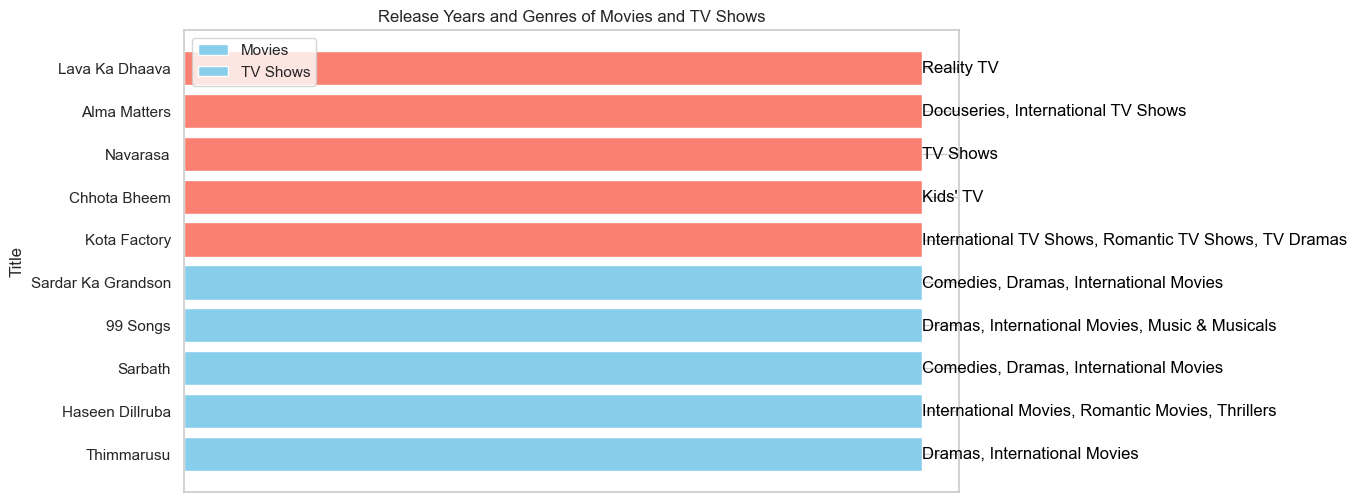

In [244]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for demonstration
movies_data = {
    'title': ['Thimmarusu', 'Haseen Dillruba', 'Sarbath', '99 Songs', 'Sardar Ka Grandson'],
    'release_year': [2021, 2021, 2021, 2021, 2021],
    'genre': [
        'Dramas, International Movies',
        'International Movies, Romantic Movies, Thrillers',
        'Comedies, Dramas, International Movies',
        'Dramas, International Movies, Music & Musicals',
        'Comedies, Dramas, International Movies'
    ]
}

tv_shows_data = {
    'title': ['Kota Factory', 'Chhota Bheem', 'Navarasa', 'Alma Matters', 'Lava Ka Dhaava'],
    'release_year': [2021, 2021, 2021, 2021, 2021],
    'genre': [
        'International TV Shows, Romantic TV Shows, TV Dramas',
        "Kids' TV",
        'TV Shows',
        'Docuseries, International TV Shows',
        'Reality TV'
    ]
}

# Create a combined dataframe for movies and TV shows
combined_data = pd.concat([pd.DataFrame(movies_data), pd.DataFrame(tv_shows_data)], ignore_index=True)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create a horizontal bar plot for the movie and TV show titles, release years, and genres
for i, row in combined_data.iterrows():
    color = 'skyblue' if row['title'] in movies_data['title'] else 'salmon'
    ax.barh(row['title'], row['release_year'], color=color)
    ax.text(row['release_year'] - 0.05, i, row['genre'], ha='left', va='center', color='black')

# Turn off the x-axis
ax.xaxis.set_visible(False)

# Set labels and title
ax.set_ylabel('Title')
ax.set_title('Release Years and Genres of Movies and TV Shows')
ax.legend(['Movies', 'TV Shows'])

plt.show()


/var/folders/c6/hdyn7chd4w10061yk0b90r8w0000gn/T/ipykernel_75496/1102089665.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='release_year', y='title', data=movies, ax=axes[0], palette='viridis')
/var/folders/c6/hdyn7chd4w10061yk0b90r8w0000gn/T/ipykernel_75496/1102089665.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='release_year', y='title', data=tv_shows, ax=axes[1], palette='magma')


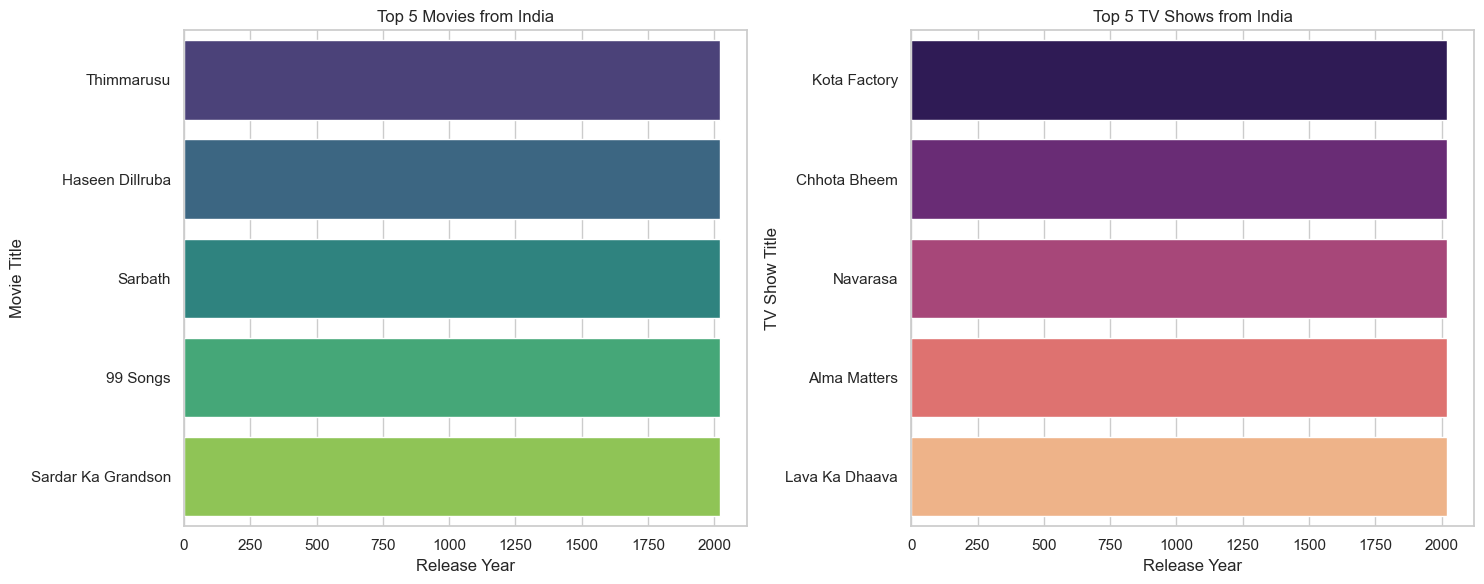

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Create subplots for movies and TV shows
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Create a bar plot for top 5 movies
sns.barplot(x='release_year', y='title', data=movies, ax=axes[0], palette='viridis')
axes[0].set_title('Top 5 Movies from India')
axes[0].set_xlabel('Release Year')
axes[0].set_ylabel('Movie Title')

# Create a bar plot for top 5 TV shows
sns.barplot(x='release_year', y='title', data=tv_shows, ax=axes[1], palette='magma')
axes[1].set_title('Top 5 TV Shows from India')
axes[1].set_xlabel('Release Year')
axes[1].set_ylabel('TV Show Title')

plt.tight_layout()
plt.show()

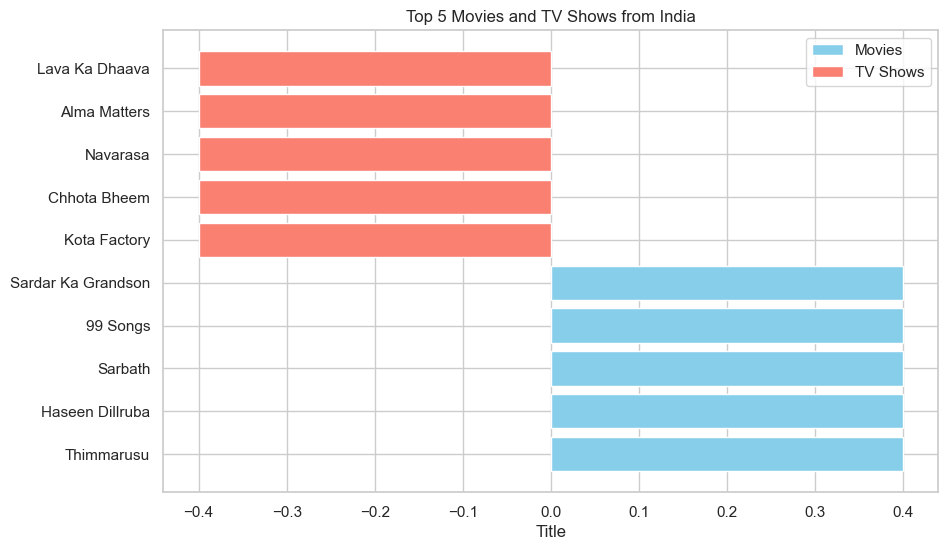

In [203]:
import matplotlib.pyplot as plt

# Create a horizontal bar plot for the top 5 movies and TV shows
fig, ax = plt.subplots(figsize=(10, 6))

# Plot top 5 movies
ax.barh(movies['title'], 0.4, label='Movies', color='skyblue')

# Plot top 5 TV shows
ax.barh(tv_shows['title'], -0.4, label='TV Shows', color='salmon')

# Set labels and title
ax.set_xlabel('Title')
ax.set_title('Top 5 Movies and TV Shows from India')

# Add legend
ax.legend(loc='upper right')

plt.show()

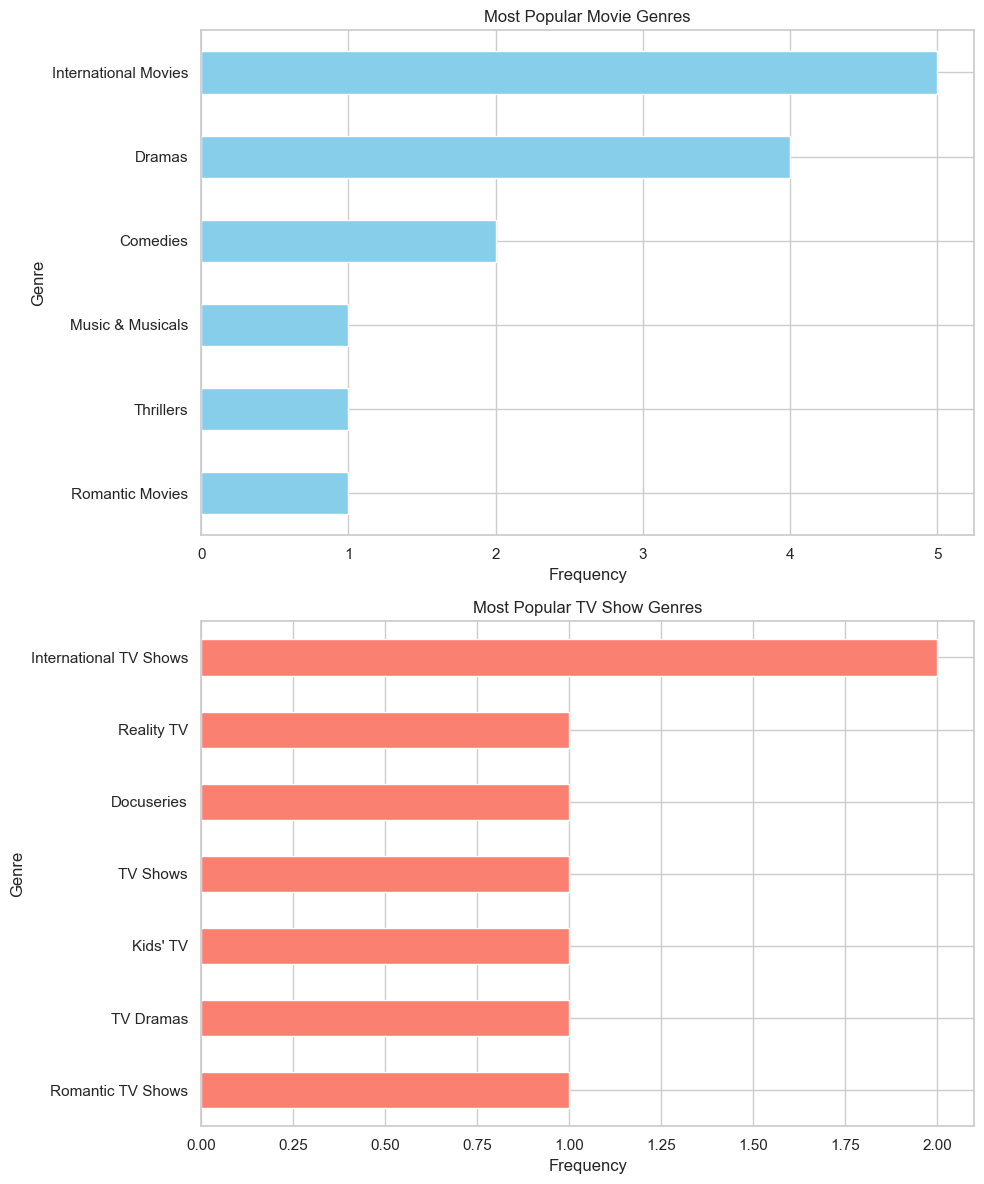

In [217]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for demonstration
movies = {
    'title': ['Thimmarusu', 'Haseen Dillruba', 'Sarbath', '99 Songs', 'Sardar Ka Grandson'],
    'genre': ['Dramas, International Movies', 'International Movies, Romantic Movies, Thrillers', 'Comedies, Dramas, International Movies', 'Dramas, International Movies, Music & Musicals', 'Comedies, Dramas, International Movies']
}

tv_shows = {
    'title': ['Kota Factory', 'Chhota Bheem', 'Navarasa', 'Alma Matters', 'Lava Ka Dhaava'],
    'genre': ['International TV Shows, Romantic TV Shows, TV Dramas', "Kids' TV", 'TV Shows', 'Docuseries, International TV Shows', 'Reality TV']
}

# Flatten the genres from the movie and TV show data
all_movie_genres = [genre for movie_genres in movies['genre'] for genre in movie_genres.split(', ')]
all_tv_show_genres = [genre for tv_show_genres in tv_shows['genre'] for genre in tv_show_genres.split(', ')]

# Create a dataframe to count the occurrences of each genre
movie_genres_df = pd.Series(all_movie_genres).value_counts().sort_values(ascending=True)
tv_show_genres_df = pd.Series(all_tv_show_genres).value_counts().sort_values(ascending=True)

# Create the figure and the axes
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Create a bar plot for the most popular movie genres
movie_genres_df.plot(kind='barh', ax=ax[0], color='skyblue')
ax[0].set_title('Most Popular Movie Genres')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Genre')

# Create a bar plot for the most popular TV show genres
tv_show_genres_df.plot(kind='barh', ax=ax[1], color='salmon')
ax[1].set_title('Most Popular TV Show Genres')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Genre')

plt.tight_layout()
plt.show()

In [204]:
import pandas as pd
file_path = "/Users/irynaoleinikova/Documents/Ironhack/Projects/Project-1/collected_data/netflix_revenue_updated.csv"

df = pd.read_csv('/Users/irynaoleinikova/Documents/Ironhack/Projects/Project-1/collected_data/netflix_revenue_updated.csv')
df
# UACN : United States and Canada
# EMEA : Europe, Middle East and Africa
# APAC : Asia-Pacific (Our focus)
# LATM : Latin America

,Date,Global Revenue,UCAN Streaming Revenue,EMEA Streaming Revenue,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships
0,31-03-2019,4520992000,2256851000,1233379000,630472000,319602000,66633000,42542000,27547000,12141000,11.45,10.23,7.84,9.37,148863000
1,30-06-2019,4923116000,2501199000,1319087000,677136000,349494000,66501000,44229000,27890000,12942000,12.52,10.13,8.14,9.29,151562000
2,30-09-2019,5244905000,2621250000,1428040000,741434000,382304000,67114000,47355000,29380000,14485000,13.08,10.40,8.63,9.29,158334000
3,31-12-2019,5467434000,2671908000,1562561000,746392000,418121000,67662000,51778000,31417000,16233000,13.22,10.51,8.18,9.07,167090000
4,31-03-2020,5767691000,2702776000,1723474000,793453000,483660000,69969000,58734000,34318000,19835000,13.09,10.40,8.05,8.94,182856000
5,30-06-2020,6148286000,2839670000,1892537000,785368000,569140000,72904000,61483000,36068000,22492000,13.25,10.50,7.44,8.96,192947000
6,30-09-2020,6435637000,2933445000,2019083000,789384000,634891000,73081000,62242000,36324000,23504000,13.40,10.88,7.27,9.20,195151000
7,31-12-2020,6644442000,2979505000,2137158000,788522000,684609000,73936000,66698000,37537000,25492000,13.51,11.05,7.12,9.32,203663000
8,31-03-2021,7163282000,3170972000,2343674000,836647000,762414000,74384000,68508000,37894000,26853000,14.25,11.56,7.39,9.71,207639000
9,30-06-2021,7341777000,3234643000,2400480000,860882000,799480000,73951000,68696000,38658000,27875000,14.54,11.66,7.50,9.74,209180000


In [205]:
plt.figure(figsize=(15,10), dpi=700, facecolor="yellow") 
plt.plot(df.index, df["Global Revenue"], color="blue") 
plt.xlabel("Date", fontdict={'family': 'fantasy', 'color': 'black', 'size': 15}) 
plt.xticks(rotation=90, ha='right') 
plt.ylabel("Global Revenue", fontdict={'family': 'fantasy', 'color': 'black', 'size': 15}) 
plt.title("Global Revenue vs Time", fontdict={'family': 'fantasy', 'color': 'black', 'size': 20}) 
plt.show()

/var/folders/c6/hdyn7chd4w10061yk0b90r8w0000gn/T/ipykernel_75496/913874415.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


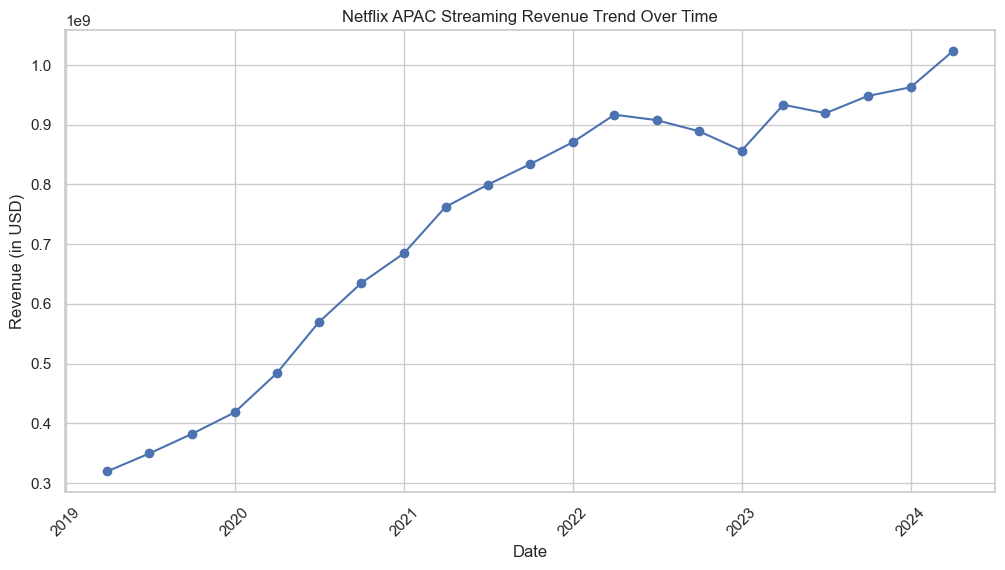

In [206]:
# Converted the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Plot the revenue trend in the APAC region over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['APAC Streaming Revenue'], marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Revenue (in USD)')
plt.title('Netflix APAC Streaming Revenue Trend Over Time')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

/var/folders/c6/hdyn7chd4w10061yk0b90r8w0000gn/T/ipykernel_75496/3936223266.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index.year, y=df["APAC Streaming Revenue"], palette="viridis")


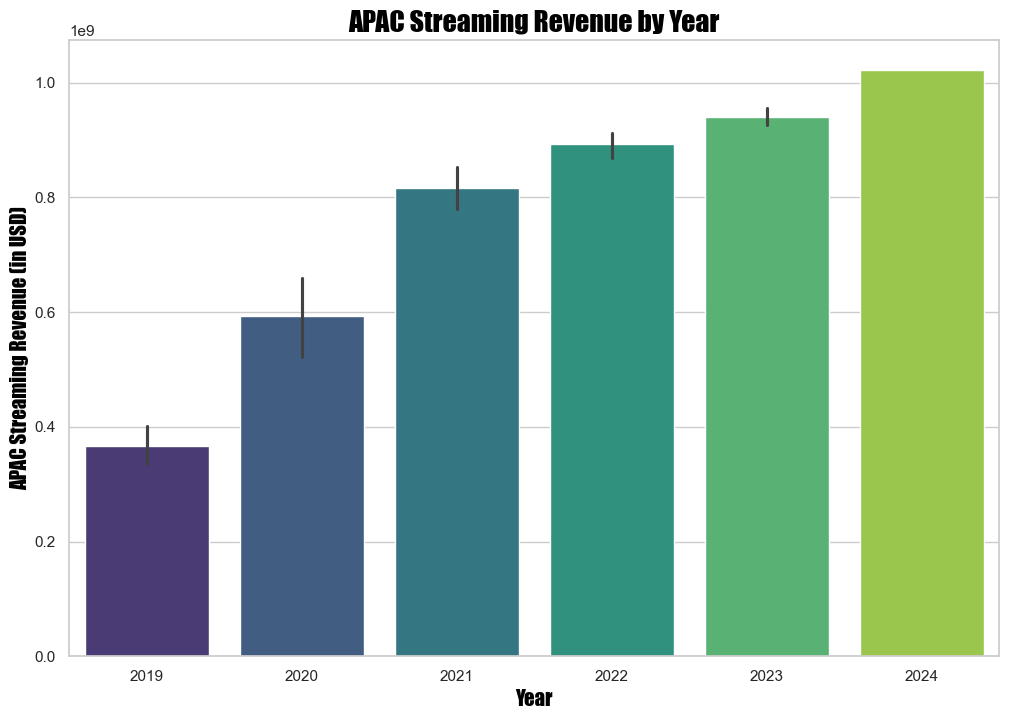

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the revenue for the APAC region each year
plt.figure(figsize=(12, 8))
sns.barplot(x=df.index.year, y=df["APAC Streaming Revenue"], palette="viridis")
plt.xlabel("Year", fontdict={'family': 'fantasy', 'color': 'black', 'size': 15})
plt.ylabel("APAC Streaming Revenue (in USD)", fontdict={'family': 'fantasy', 'color': 'black', 'size': 15})
plt.title("APAC Streaming Revenue by Year", fontdict={'family': 'fantasy', 'color': 'black', 'size': 20})

plt.show()

/var/folders/c6/hdyn7chd4w10061yk0b90r8w0000gn/T/ipykernel_75496/2984896139.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/ts

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.78608D+00    |proj g|=  2.06113D+00

At iterate    5    f=  7.16607D+00    |proj g|=  4.02713D-02

At iterate   10    f=  7.15625D+00    |proj g|=  3.84534D-03

At iterate   15    f=  7.13920D+00    |proj g|=  1.26359D-02

At iterate   20    f=  7.13512D+00    |proj g|=  8.80384D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     34      1     0     0   3.898D-06   7.135D+00
  F =   7.1350525148390007     

CONVERG

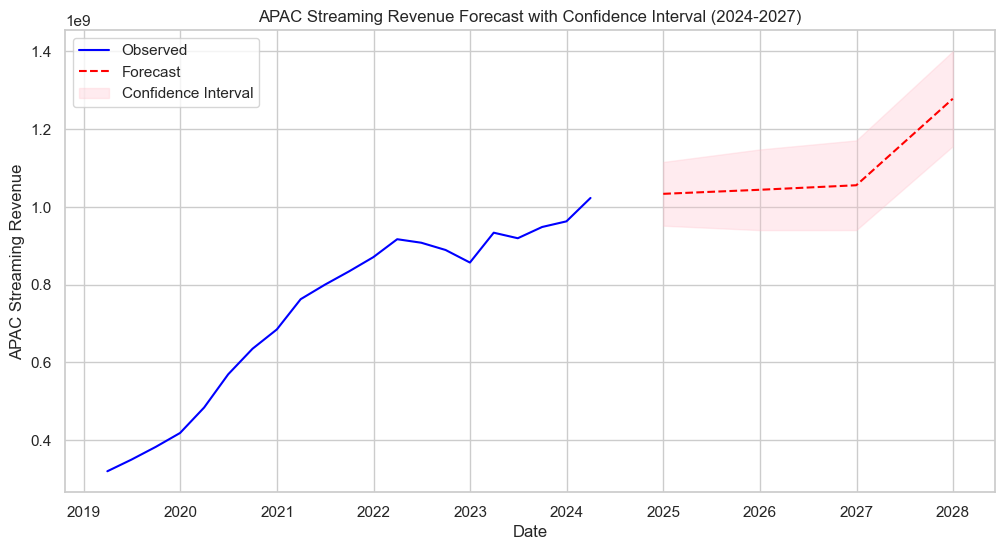

In [213]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Prepare the data
df = pd.read_csv('/Users/irynaoleinikova/Documents/Ironhack/Projects/Project-1/collected_data/netflix_revenue_updated.csv')  # Replace with the actual file path
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Fit the SARIMAX model with seasonal parameters
model = SARIMAX(df["APAC Streaming Revenue"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Make predictions for the future dates including 2024-2027
forecast_horizon = 4  # 2024 to 2027 (inclusive)
forecast = results.get_forecast(steps=forecast_horizon)
forecast_values = forecast.predicted_mean.to_numpy()
forecast_index = pd.date_range(start=latest_date, periods=forecast_horizon, freq='Y')

# Plot the forecasted values and historical data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["APAC Streaming Revenue"], label='Observed', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red', linestyle='--')
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('APAC Streaming Revenue')
plt.title('APAC Streaming Revenue Forecast with Confidence Interval (2024-2027)')
plt.legend()
plt.show()